# Import modules

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [92]:
df = pd.read_excel('Loan.xlsx')

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


* **Loan_ID** - Id кредита
* **Gender** - Пол (Male/Female)
* **Married** - Семейное положение (Yes, No)
* **Dependents** - иждивенцы (0, 1, 2, 3+)
* **Education** - образование (Graduate, Not Graduate)
* **Self_Employed** - Предприниматель (Yes, No)
* **Applicantincome** - доход 
* **CoapplicantIncome** - доход созаявителя
* **LoanAmount** - величина займа
* **Loan_Amount_Term** - срок займа
* **Credit_History** - кредитная история
* **Property_Area** - местность (Urban, Rural)
* **Loan_Status** - статус кредита(Y,N)


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [95]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Preprocessing the dataset

In [96]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [97]:
#fill the missing for categorical term - mode ('Gender', 'Married', 'Dependents', 'Self_Employed')
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [98]:
#fill the missing for numerical term - mean ('LoanAmount', 'Loan_Amount_Term') 
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [99]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

number of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


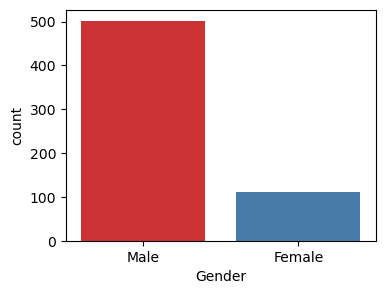

In [100]:
print('number of people who take loan as group by gender')
print(df['Gender'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Gender', palette = 'Set1')
plt.show()

number of people who take loan as group by marital status
Yes    401
No     213
Name: Married, dtype: int64


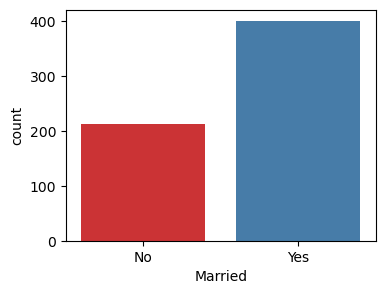

In [101]:
print('number of people who take loan as group by marital status')
print(df['Married'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Married', palette = 'Set1')
plt.show()

number of people who take loan as group by dependents
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


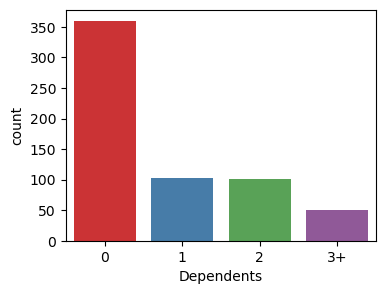

In [102]:
print('number of people who take loan as group by dependents')
print(df['Dependents'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Dependents', palette = 'Set1')
plt.show()

number of people who take loan as group by self employed
No     532
Yes     82
Name: Self_Employed, dtype: int64


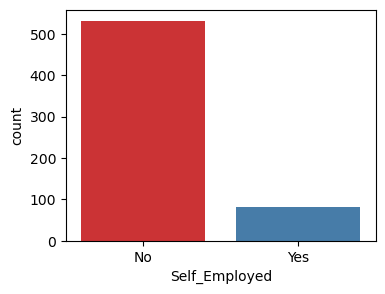

In [103]:
print('number of people who take loan as group by self employed')
print(df["Self_Employed"].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = "Self_Employed", palette = 'Set1')
plt.show()

number of people who take loan as group by education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


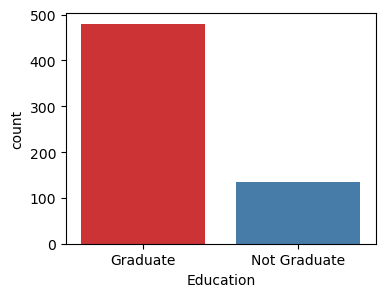

In [104]:
print('number of people who take loan as group by education')
print(df['Education'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Education', palette = 'Set1')
plt.show()

number of people who take loan as group by property area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


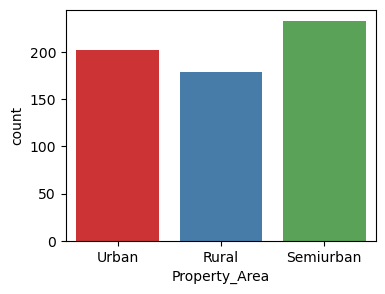

In [105]:
print('number of people who take loan as group by property area')
print(df['Property_Area'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Property_Area', palette = 'Set1')
plt.show()

number of people who take loan as group by credit history
1.0    525
0.0     89
Name: Credit_History, dtype: int64


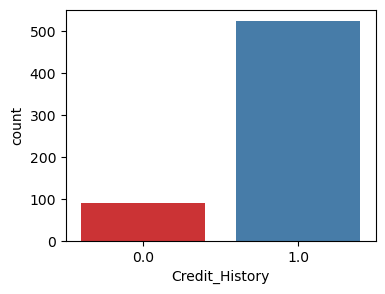

In [106]:
print('number of people who take loan as group by credit history')
print(df['Credit_History'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Credit_History', palette = 'Set1')
plt.show()

number of people who take loan as group by loan status
Y    422
N    192
Name: Loan_Status, dtype: int64


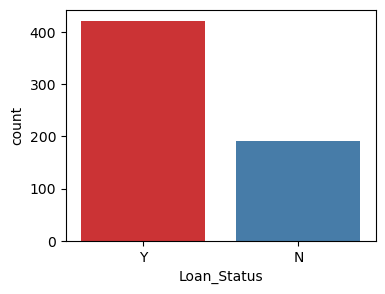

In [107]:
print('number of people who take loan as group by loan status')
print(df['Loan_Status'].value_counts())
plt.figure(figsize=(4, 3))
sns.countplot(data = df, x = 'Loan_Status', palette = 'Set1')
plt.show()

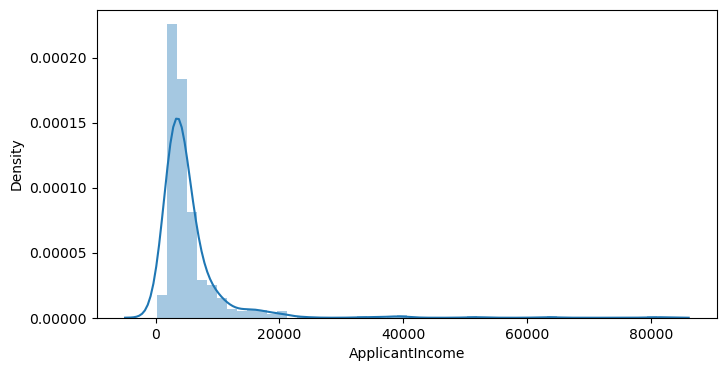

In [108]:
plt.figure(figsize=(8, 4))
sns.distplot(df['ApplicantIncome'])
plt.show()

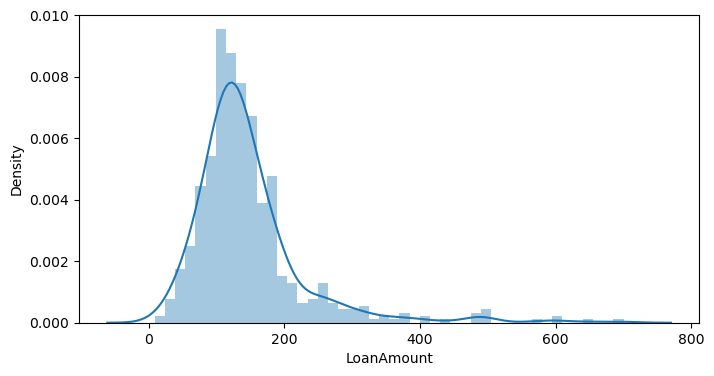

In [109]:
plt.figure(figsize=(8, 4))
sns.distplot(df['LoanAmount'])
plt.show()

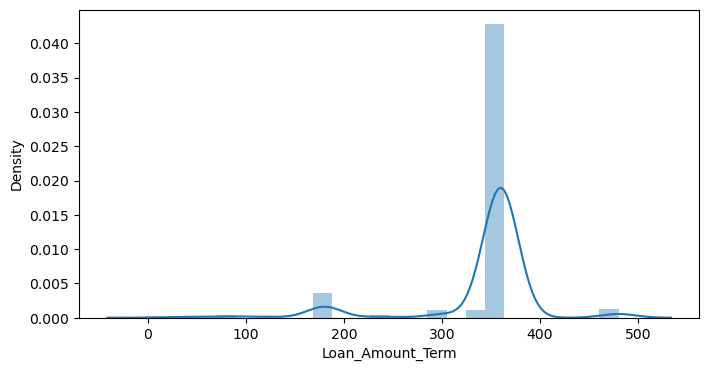

In [110]:
plt.figure(figsize=(8, 4))
sns.distplot(df['Loan_Amount_Term'])
plt.show()

# Creation of new attributes

In [111]:
#Create a TotalIncome column
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Log transformation

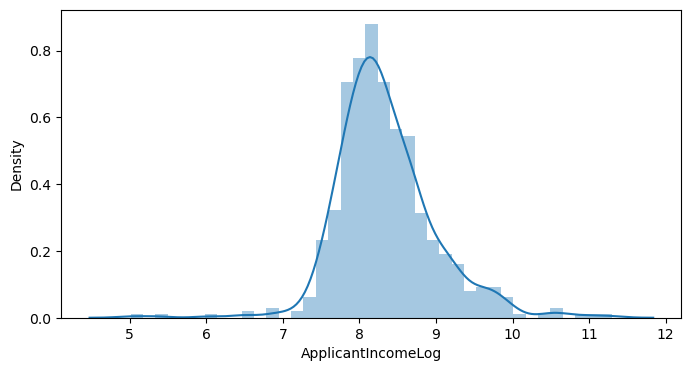

In [112]:
#apply Log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
plt.figure(figsize=(8, 4))
sns.distplot(df['ApplicantIncomeLog'])
plt.show()

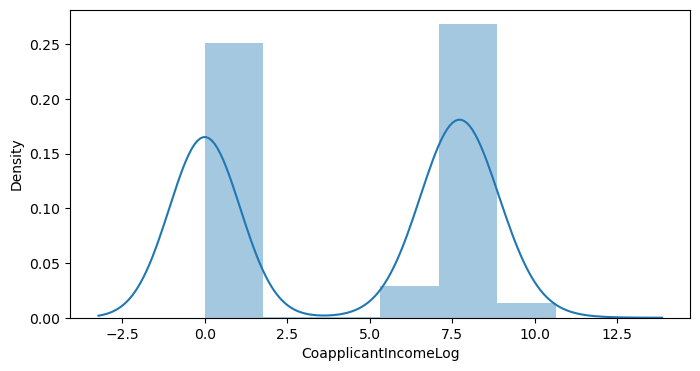

In [113]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
plt.figure(figsize=(8, 4))
sns.distplot(df['CoapplicantIncomeLog'])
plt.show()

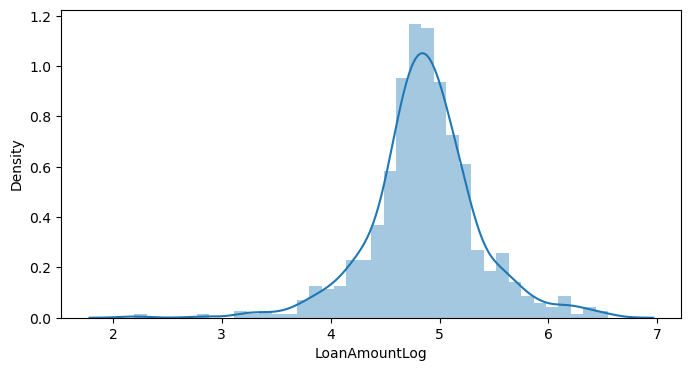

In [114]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
plt.figure(figsize=(8, 4))
sns.distplot(df['LoanAmountLog'])
plt.show()

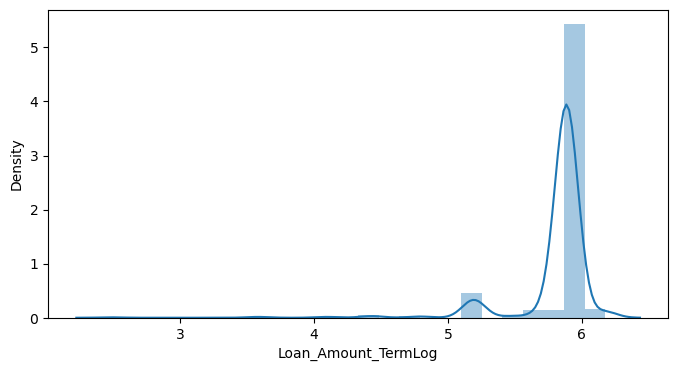

In [115]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
plt.figure(figsize=(8, 4))
sns.distplot(df['Loan_Amount_TermLog'])
plt.show()

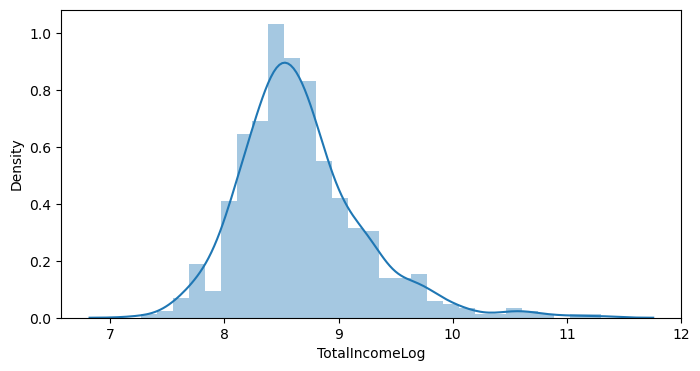

In [116]:
df['TotalIncomeLog'] = np.log(df['TotalIncome'])
plt.figure(figsize=(8, 4))
sns.distplot(df['TotalIncomeLog'])
plt.show()

### Coorelation Matrix

<Axes: >

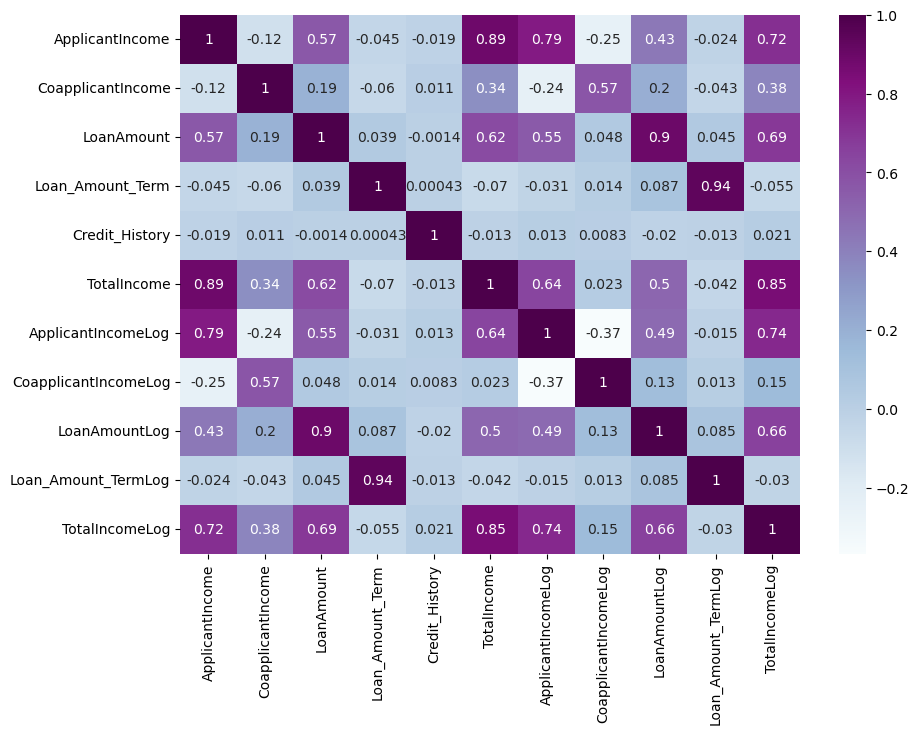

In [117]:
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [118]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,0.000000,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.319202,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,0.000000,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765993,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,0.000000,4.948760,5.886104,8.699515


In [119]:
#drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Loan_ID', 'CoapplicantIncomeLog']
df_new = df.drop(columns=cols, axis=1)
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


### Label Encoding

In [120]:
from sklearn.preprocessing import LabelEncoder
cols =['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in cols:
    df_new[col] = LabelEncoder().fit_transform(df_new[col])

In [122]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,TotalIncomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Train-Test split

In [125]:
X = df_new.drop(['Loan_Status'], axis=1)
y = df_new['Loan_Status']

In [129]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Model training

In [ ]:
# 